In [25]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline
plt.style.use("seaborn")
plt.rcParams.update({"font.size": 20})
plt.rcParams["figure.figsize"] = (15, 7)
plt.rcParams["legend.fontsize"] = "large"
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=plt.cm.tab10.colors)

## Data exploration

In [33]:
audio_data = "./accentdb_extended/data/australian/australian_s01_002.wav"
x, sr = librosa.load("./accentdb_extended/data/bangla/bangla_s01_115.wav")

In [34]:
sr

22050

In [35]:
x

array([ 0.00079142,  0.00133636,  0.00101737, ..., -0.00176384,
       -0.00125338, -0.00172269], dtype=float32)

In [13]:
ipd.Audio(filename=audio_data)

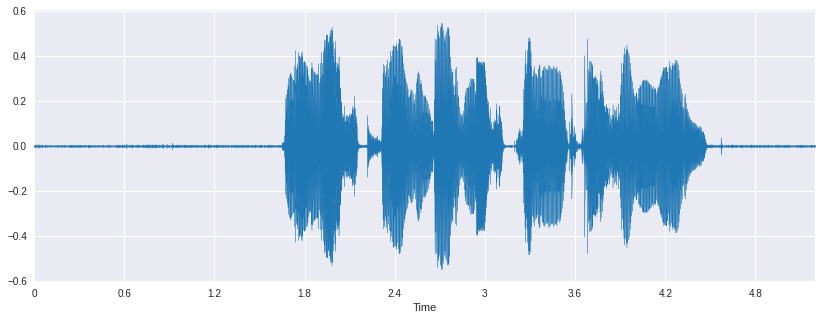

In [36]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
plt.show()

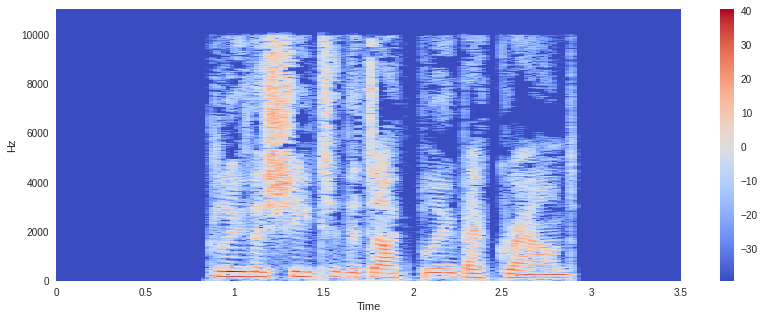

In [19]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

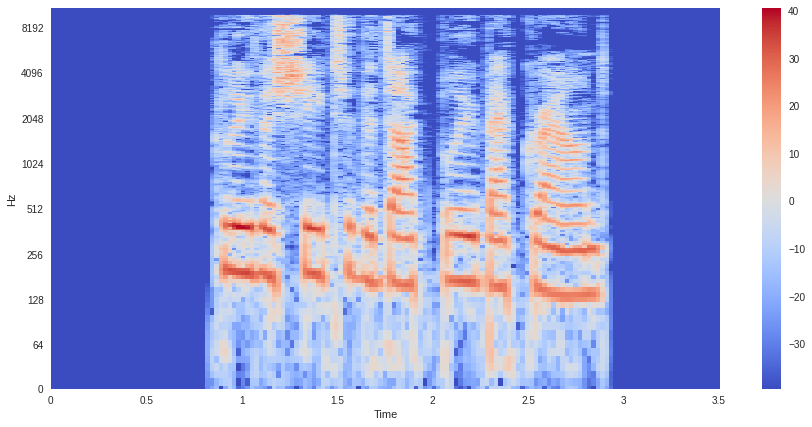

In [21]:
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="log")
plt.colorbar()
plt.show()

## Feature extraction from Audio signal

Spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ”center of mass” for a sound is located.

In [24]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [25]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(151,)

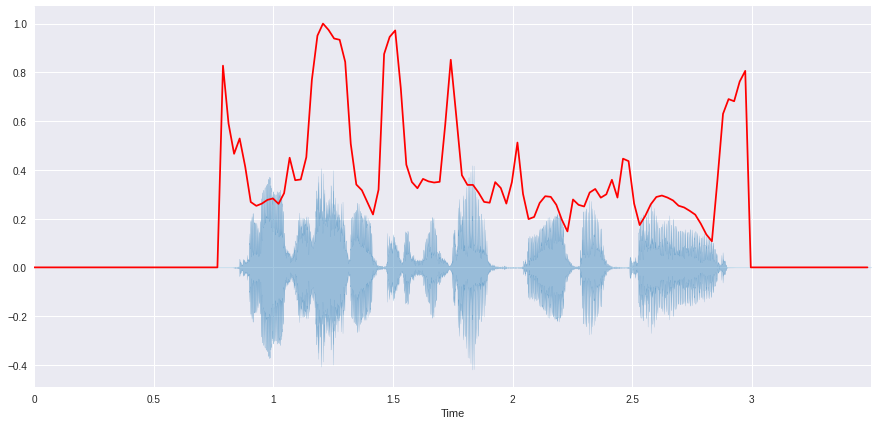

In [29]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color="r")
plt.show()

## Spectral Rolloff
It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.


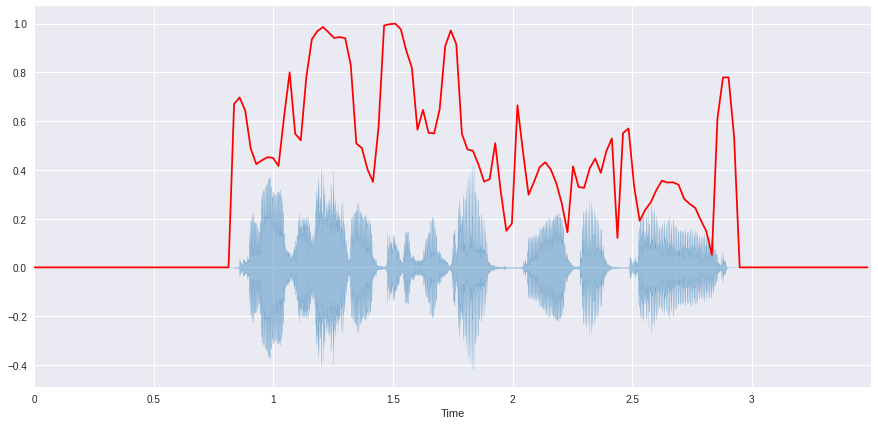

In [30]:
spectral_rolloff = librosa.feature.spectral_rolloff(x + 0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color="r")
plt.show()

## Spectral Bandwidth

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

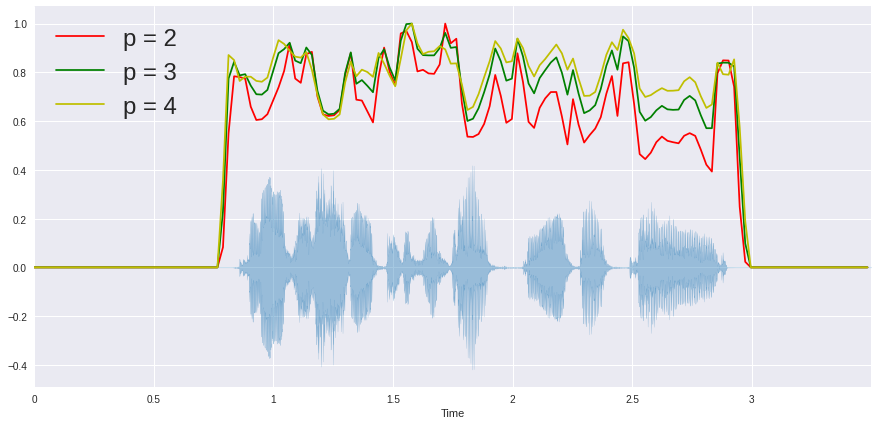

In [32]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x + 0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x + 0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x + 0.01, sr=sr, p=4)[0]

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color="r")
plt.plot(t, normalize(spectral_bandwidth_3), color="g")
plt.plot(t, normalize(spectral_bandwidth_4), color="y")
plt.legend(("p = 2", "p = 3", "p = 4"))
plt.show()